In [1]:
import os
import sys
import pathlib
code_paths = {}
code_paths["repo_name"] = "p5-stress-classifier"

code_paths["repo_path"] = os.getcwd()
base_dir = os.path.basename(code_paths["repo_path"])
while base_dir != code_paths["repo_name"]:
    code_paths["repo_path"] = os.path.dirname(os.path.abspath(code_paths["repo_path"]))
    base_dir = os.path.basename(code_paths["repo_path"])

package_dir = pathlib.Path(code_paths["repo_path"], "src")
sys.path.append(str(package_dir))
from stresspred import code_paths

C:\Users\dbenesch\.conda\envs\stress-requirements\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
for path in code_paths["neurokit2_paths"]:
    sys.path.append(str(path))

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [10]:
import neurokit2 as nk
nk.version()

- OS: Windows (WindowsPE 64bit) 
- Python: 3.9.12 
- NeuroKit2: 0.2.0 

- NumPy: 1.21.0 
- Pandas: 1.4.2 
- SciPy: 1.7.3 
- sklearn: 1.0.2 
- matplotlib: 3.5.1


In [26]:
#sampling_rate = 7500
sampling_rate = 48000
ppg_signal = nk.ppg.ppg_simulate(sampling_rate=sampling_rate)

In [27]:
filtered = nk.signal_filter(
        ppg_signal, sampling_rate=sampling_rate, lowcut=0.5, highcut=8, order=3, method="butter_ba"
    )

In [28]:
filtered

array([nan, nan, nan, ..., nan, nan, nan])

In [29]:
filtered = nk.signal_filter(
        ppg_signal, sampling_rate=sampling_rate, lowcut=0.5, highcut=8, order=3, method="butter_ba"
    )
np.unique(np.isfinite(filtered))

array([False])

In [30]:
filtered = nk.signal_filter(
        ppg_signal, sampling_rate=sampling_rate, lowcut=0.5, highcut=8, order=3, method="butterworth"
    )
np.unique(np.isfinite(filtered))

array([ True])

In [82]:
clean = nk.signal_filter(
        signal=ppg_signal, sampling_rate=sampling_rate, lowcut=0.5, method="butterworth", order=5
    )

clean = nk.signal_filter(
    signal=clean, sampling_rate=sampling_rate, method="powerline", powerline=50
)

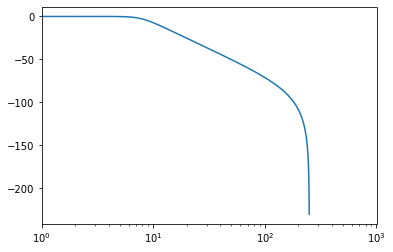

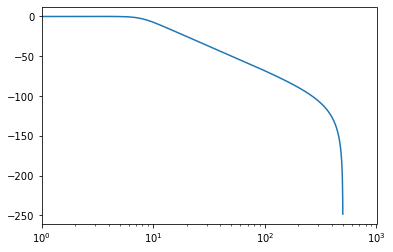

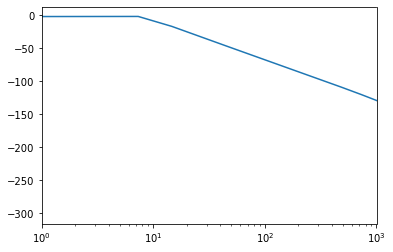

In [76]:
for sampling_rate in [500, 1000, 7500]:
    b, a = scipy.signal.butter(3, [0.5,8], btype="bandpass", output="ba", fs=sampling_rate)
    w, h = scipy.signal.freqz(b, a, fs=sampling_rate)
    plt.figure()
    plt.semilogx(w, 20 * np.log10(abs(h)))
    plt.xlim([1, 1000])
    plt.show()

In [56]:
signals, info = nk.ppg_process(ppg_signal, sampling_rate=sampling_rate)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
nk.signal_plot(signals["PPG_Clean"])